# **Experimenting with various model structures with transfer learning on 10% and 1% of food vision database**

In [1]:
!nvidia-smi

Mon Nov  8 20:28:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import *

--2021-11-08 20:28:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-08 20:28:41 (68.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2021-11-08 20:28:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2021-11-08 20:28:45 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

**Using the basic EfficientNet model on 10% of food vision data**

In [7]:
import tensorflow as tf
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'
BS = 32 
IMG_SIZE =(224,224)
train_data  = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BS)

Found 750 files belonging to 10 classes.


In [8]:
test_data  = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,label_mode="categorical",batch_size=BS)

Found 2500 files belonging to 10 classes.


In [9]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input( shape = ( 224,224,3 ))

16719872/16705208 [==============================] - 0s 0us/step


In [10]:
model = base_model(inputs)
model = tf.keras.layers.GlobalAveragePooling2D()(model)
outputs = tf.keras.layers.Dense(10, activation="softmax")(model)

model_0 =tf.keras.Model(inputs,outputs)



In [35]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [11]:
model_0.compile(optimizer= tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
track = model_0.fit(train_data,epochs = 5,validation_data=test_data,callbacks=[create_tensorboard_callback("transfer","23")])

Saving TensorBoard log files to: transfer/23/20211108-202953
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 62s 1s/step - loss: 1.9246 - accuracy: 0.3973 - val_loss: 1.3677 - val_accuracy: 0.6976
Epoch 2/5
24/24 [==============================] - 14s 573ms/step - loss: 1.1575 - accuracy: 0.7293 - val_loss: 0.9270 - val_accuracy: 0.7956
Epoch 3/5
24/24 [==============================] - 14s 572ms/step - loss: 0.8455 - accuracy: 0.8080 - val_loss: 0.7532 - val_accuracy: 0.8188
Epoch 4/5
24/24 [==============================] - 14s 571ms/step - loss: 0.6911 - accuracy: 0.8440 - val_loss: 0.6647 - val_accuracy: 0.8284
Epoch 5/5
24/24 [==============================] - 14s 567ms/step - loss: 0.5854 - accuracy: 0.8720 - val_loss: 0.6099 - val_accuracy: 0.8348


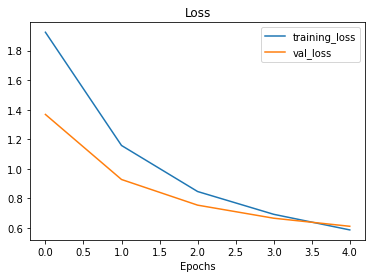

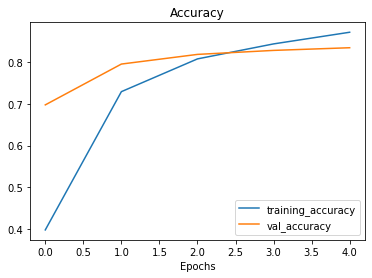

In [13]:
plot_loss_curves(track)

**Testing on Food Vision data on 1% of data using an augmentation layer**

In [14]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-11-08 20:32:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.128, 173.194.197.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   179MB/s    in 0.7s    

2021-11-08 20:32:06 (179 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



Pre processing data

In [15]:
train_dir = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"
train_data_1 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode= "categorical",
                                                                   batch_size=BS,image_size=IMG_SIZE)
test_data_1 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   label_mode= "categorical",
                                                                   batch_size=BS,image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
import tensorflow as tf
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing


In [17]:
aug_layer = tf.keras.Sequential([
                                 preprocessing.RandomFlip("horizontal"),
                                 preprocessing.RandomRotation(0.2),
                                 preprocessing.RandomZoom(0.2),
                                 preprocessing.RandomHeight(0.2),
                                 preprocessing.RandomWidth(0.2),
])

In [18]:
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape)

z = aug_layer(inputs)

z = base_model(z , training = False)

z = layers.GlobalAveragePooling2D()(z)

outs = layers.Dense(10,activation="softmax")(z)

model_1 = tf.keras.Model(inputs,outs)

In [19]:
model_1.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer= optimizers.Adam())

In [20]:
track1 = model_1.fit(train_data_1,epochs = 15,steps_per_epoch= len(train_data_1),validation_data=test_data_1,validation_steps=int(0.25 * len(test_data_1)),callbacks = [create_tensorboard_callback("training","1 percent")])

Saving TensorBoard log files to: training/1 percent/20211108-203212
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 15s 3s/step - loss: 2.4691 - accuracy: 0.0571 - val_loss: 2.2947 - val_accuracy: 0.1151
Epoch 2/15
3/3 [==============================] - 7s 3s/step - loss: 2.1968 - accuracy: 0.1429 - val_loss: 2.1613 - val_accuracy: 0.2270
Epoch 3/15
3/3 [==============================] - 5s 2s/step - loss: 1.9990 - accuracy: 0.4429 - val_loss: 2.0611 - val_accuracy: 0.2928
Epoch 4/15
3/3 [==============================] - 7s 3s/step - loss: 1.8255 - accuracy: 0.5143 - val_loss: 1.9658 - val_accuracy: 0.3322
Epoch 5/15
3/3 [==============================] - 7s 3s/step - loss: 1.6882 - accuracy: 0.6857 - val_loss: 1.8637 - val_accuracy: 0.4079
Epoch 6/15
3/3 [==============================] - 4s 2s/step - loss: 1.5336 - accuracy: 0.7000 - val_loss: 1.7876 - val_accuracy: 0.4342
Epoch 7/15
3/3 [==============================] - 5s 2s/step - loss: 1.4294 - accuracy: 0.7286 - val_loss: 1.7151 - val_accuracy: 0.4770
Epoch 8/15
3/3 [==============================] - 6

Plotting Loss curves

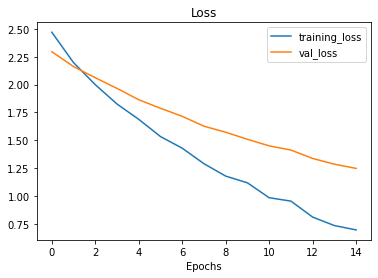

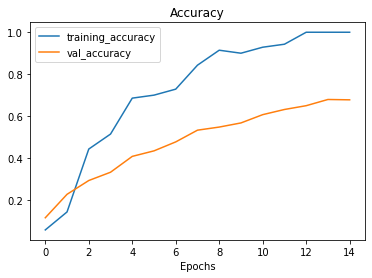

In [21]:
plot_loss_curves(track1)

**Recreating Model_0 but with best saving the best weights only**

Preprocessing data

In [22]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"
train_data_10 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                   label_mode= "categorical",
                                                                   batch_size=BS,image_size=IMG_SIZE)
test_data_10 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   label_mode= "categorical",
                                                                   batch_size=BS,image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
model_2 = tf.keras.Model(inputs,outs)
model_2.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer= optimizers.Adam())

In [24]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [25]:
cp_paths= "weights/checkpoint.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=cp_paths, save_best_only= True, save_weights_only=True,save_freq='epoch',verbose = 1)

In [26]:
track1 = model_1.fit(train_data_10,epochs = 15,steps_per_epoch= len(train_data_10),validation_data=test_data_10,validation_steps=int(0.25 * len(test_data_10)),callbacks = [create_tensorboard_callback("training","1 percent"),cp_callback])

Saving TensorBoard log files to: training/1 percent/20211108-203357
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 18s 737ms/step - loss: 1.3510 - accuracy: 0.6080 - val_loss: 1.0198 - val_accuracy: 0.7155

Epoch 00001: val_loss improved from inf to 1.01982, saving model to weights/checkpoint.ckpt
Epoch 2/15
24/24 [==============================] - 14s 560ms/step - loss: 1.0891 - accuracy: 0.7027 - val_loss: 0.8520 - val_accuracy: 0.7763

Epoch 00002: val_loss improved from 1.01982 to 0.85200, saving model to weights/checkpoint.ckpt
Epoch 3/15
24/24 [==============================] - 14s 549ms/step - loss: 0.9396 - accuracy: 0.7347 - val_loss: 0.7547 - val_accuracy: 0.7862

Epoch 00003: val_loss improved from 0.85200 to 0.75471, saving model to weights/checkpoint.ckpt
Epoch 4/15
24/24 [==============================] - 16s 664ms/step - loss: 0.8621 - accuracy: 0.7707 - val_loss: 0.7039 - val_accuracy: 0.8043

Epoch 00004: val_loss improved from 0.75471 to 0.70386, saving model to weights/checkpoint.ckpt
Epoch 5/15
24/24 [==============================] - 13s

Plotting loss curves

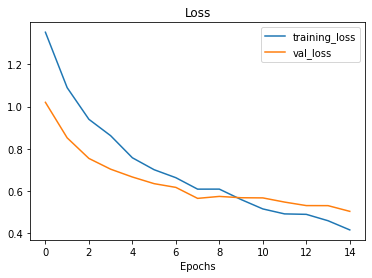

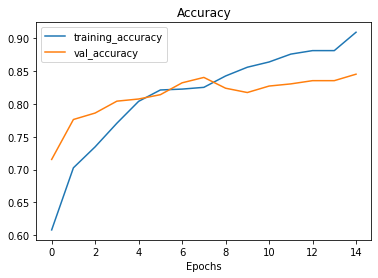

In [27]:
plot_loss_curves(track1)

In [28]:
model_2.evaluate(test_data_10)

79/79 [==============================] - 13s 129ms/step - loss: 0.5113 - accuracy: 0.8416


[0.5113022923469543, 0.8416000008583069]

**Using 10% of Food vision data on EfficientNet model but unfreezing the last 10 output layers for fine tuning, using existing highly trained weights**

In [29]:
model_2.load_weights(cp_paths)

In [30]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [31]:
model_2.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer= optimizers.Adam(learning_rate=0.0001))

In [32]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 906,042
Non-trainable params: 3,156,339
_________________________________________________________________


In [33]:
track2 = model_2.fit(train_data_10,epochs = 15,steps_per_epoch= len(train_data_10),validation_data=test_data_10,validation_steps=int(0.25 * len(test_data_10)),callbacks = [create_tensorboard_callback("training","10 percent"),cp_callback])

Saving TensorBoard log files to: training/10 percent/20211108-203853
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 24s 617ms/step - loss: 0.3937 - accuracy: 0.8947 - val_loss: 0.4646 - val_accuracy: 0.8438

Epoch 00001: val_loss improved from 0.50466 to 0.46457, saving model to weights/checkpoint.ckpt
Epoch 2/15
24/24 [==============================] - 14s 561ms/step - loss: 0.3368 - accuracy: 0.9080 - val_loss: 0.5012 - val_accuracy: 0.8388

Epoch 00002: val_loss did not improve from 0.46457
Epoch 3/15
24/24 [==============================] - 16s 643ms/step - loss: 0.3051 - accuracy: 0.9040 - val_loss: 0.4674 - val_accuracy: 0.8454

Epoch 00003: val_loss did not improve from 0.46457
Epoch 4/15
24/24 [==============================] - 13s 539ms/step - loss: 0.2569 - accuracy: 0.9280 - val_loss: 0.4622 - val_accuracy: 0.8421

Epoch 00004: val_loss improved from 0.46457 to 0.46216, saving model to weights/checkpoint.ckpt
Epoch 5/15
24/24 [==============================] - 11s 441ms/step - loss: 0.2347 - accuracy: 0.9360 - val_loss: 0.4446 - val_accuracy: 0.843

Plotting loss curves

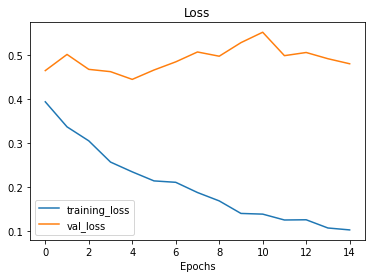

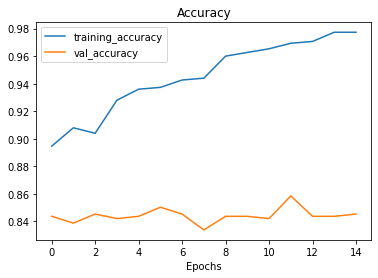

In [34]:
plot_loss_curves(track2)